In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df=data.drop('PassengerId',axis=1)

In [6]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
for i in df:
    print(df[i].value_counts())

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64
VIP
False    8291
True      199
Name: count, dtype: int64
RoomService
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: count, Length: 1273, dtype: int64
FoodCourt
0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3

In [15]:
cat_cols=df.select_dtypes(include='object').columns

In [17]:
cat_cols_graph=cat_cols.drop(['Cabin','Name'])

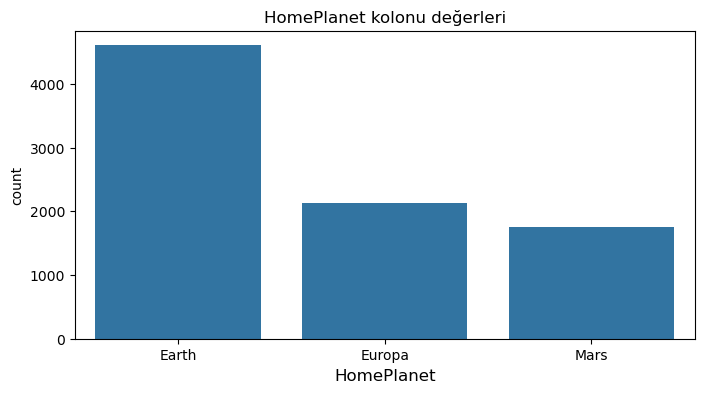

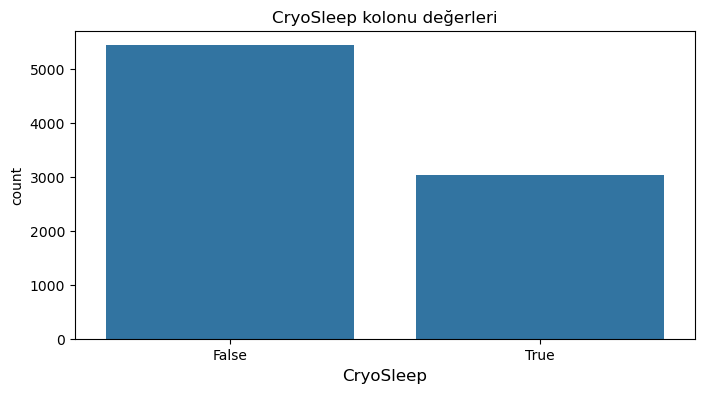

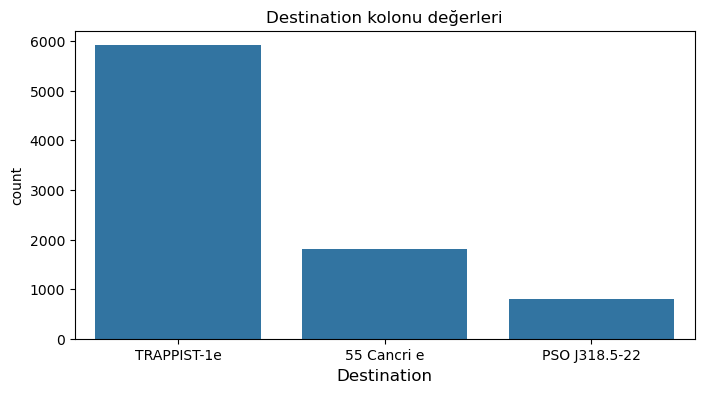

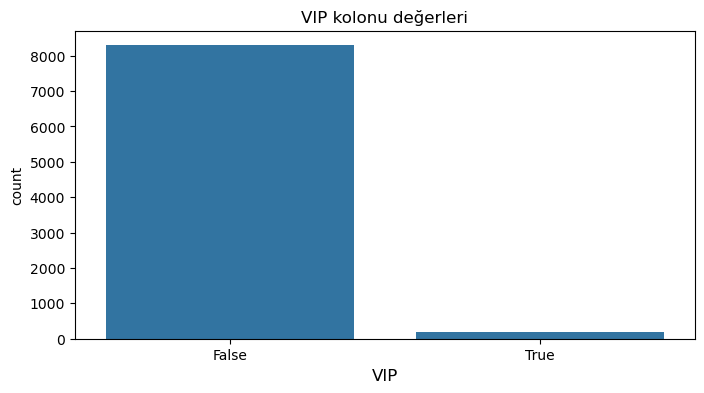

In [19]:
for i in cat_cols_graph:
    plt.figure(figsize=(8,4))
    ax=sns.countplot(data=df,x=i,order=df[i].value_counts().index)
    plt.title(f'{i} kolonu değerleri',fontsize=12)
    plt.xlabel(i,fontsize=12)
plt.show()
    

In [21]:
num_cols=df.select_dtypes(include=['int64','float64']).columns

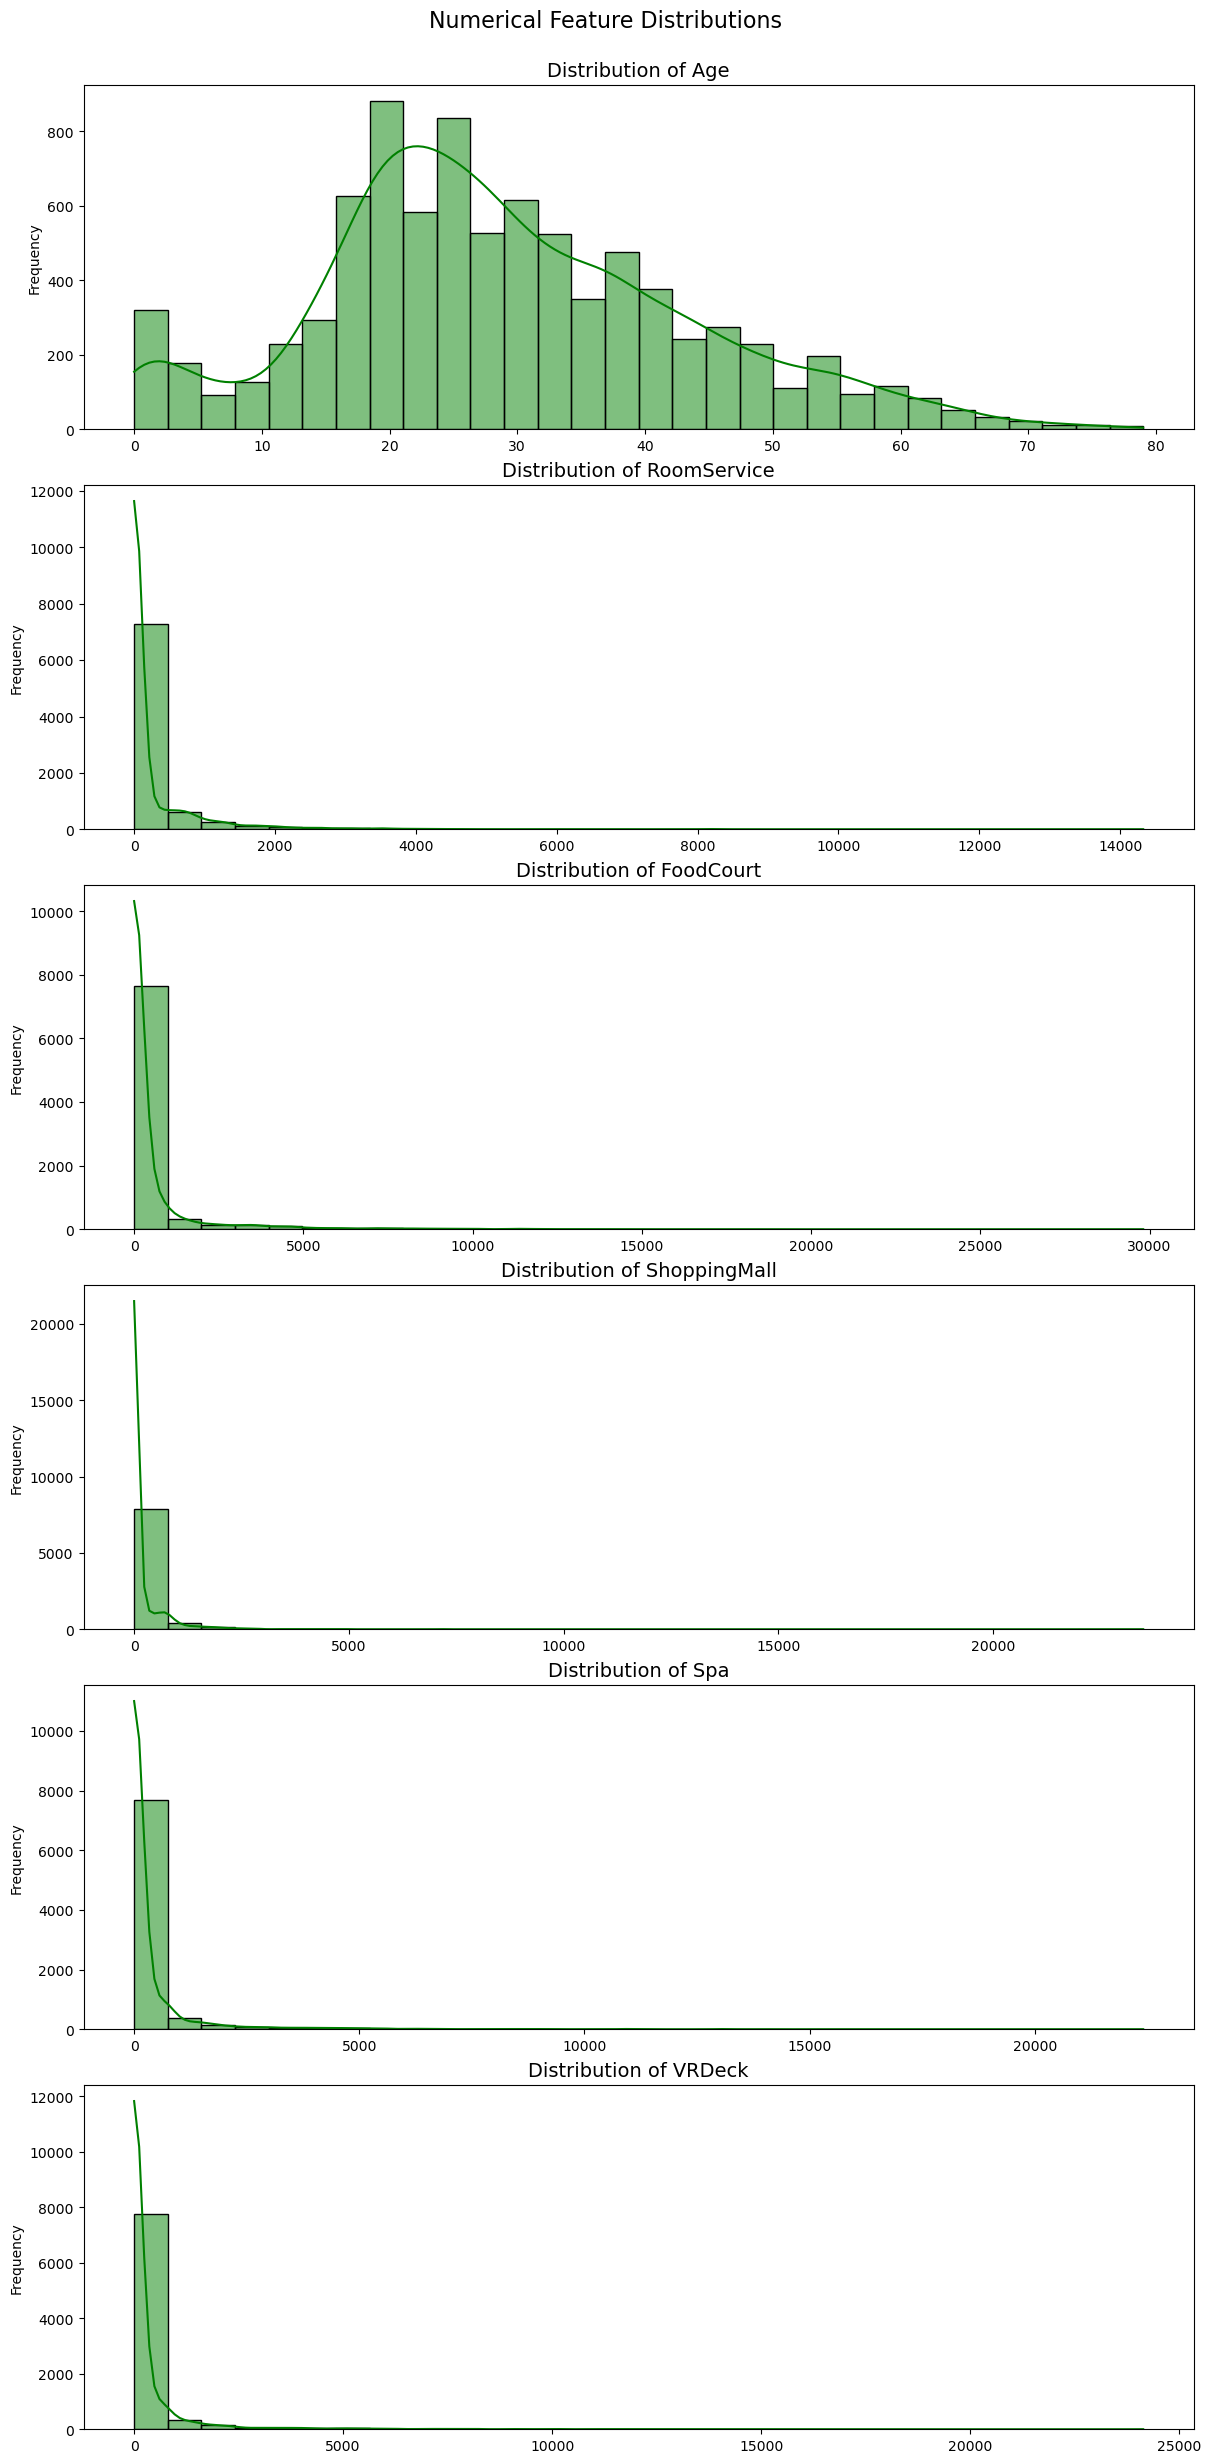

In [23]:
fig, axes = plt.subplots(len(num_cols), 1, figsize=(12, len(num_cols) * 4), constrained_layout=True)
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, color='green', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Numerical Feature Distributions', fontsize=16, y=1.02)
plt.show()

<Axes: >

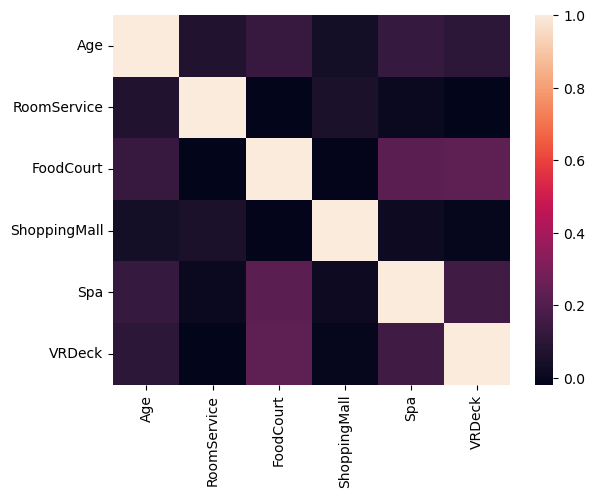

In [24]:
sns.heatmap(df[num_cols].corr())

In [27]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [29]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [31]:
for i in cat_cols_graph:
    print(i,':',df[i].mode()[0])

HomePlanet : Earth
CryoSleep : False
Destination : TRAPPIST-1e
VIP : False


In [33]:
for i in cat_cols_graph:
    df[i].fillna(df[i].mode()[0],inplace=True)

C:\Users\Ömer faruk\AppData\Local\Temp\ipykernel_8744\2853711396.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)
C:\Users\Ömer faruk\AppData\Local\Temp\ipykernel_8744\2853711396.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i].fillna(df[i].mode()[0],inplac

In [35]:
df.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [37]:
df.drop(['Cabin','Name'],axis=1,inplace=True)

In [39]:
df.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [41]:
for i in num_cols:
    df[i].fillna(df[i].median(skipna=True),inplace=True)

C:\Users\Ömer faruk\AppData\Local\Temp\ipykernel_8744\1279461002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(skipna=True),inplace=True)


In [43]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [45]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [47]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [48]:
encode=LabelEncoder()

In [49]:
X=df.drop('Transported',axis=1)
y=df['Transported']

In [53]:
for i in cat_cols_graph:
    X[i]=encode.fit_transform(X[i])

In [55]:
scaler=StandardScaler()

In [57]:
cols_name=X.columns

In [59]:
X=scaler.fit_transform(X)

In [61]:
X=pd.DataFrame(data=X,columns=cols_name)

In [63]:
y=y.map({'True':1,'False':0})

In [65]:
y=data['Transported']

In [67]:
y=encode.fit_transform(y)

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
rfc=RandomForestClassifier()

In [74]:
param_grid={'max_features':['auto','sqrt','log2',None],
           'max_depth':[2,3,4,5],
           'criterion':['gini','entropy'],
           'n_estimators':[100,150,200,250]}

In [76]:
grd=GridSearchCV(rfc,param_grid=param_grid,cv=5,n_jobs=4)

In [78]:
grd.fit(X_train,y_train)

KeyboardInterrupt: 

In [176]:
grd.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'n_estimators': 200}

In [90]:
rfc.set_params(criterion='gini',
 max_depth= 8,
 max_features= None,
 n_estimators= 200)

RandomForestClassifier(max_depth=8, max_features=None, n_estimators=200)

In [92]:

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=None, n_estimators=200)

In [93]:
y_pred=rfc.predict(X_test)

In [96]:
from sklearn.metrics import classification_report,roc_auc_score

In [98]:
roc_auc_score(y_test,y_pred)

0.7837479066297335

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       861
           1       0.76      0.85      0.80       878

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739



In [102]:
df_test=pd.read_csv('test.csv')

In [110]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [112]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [114]:
df_test.drop(['Cabin','Name'],axis=1,inplace=True)

In [116]:
for i in cat_cols_graph:
    df_test[i].fillna(df_test[i].mode()[0],inplace=True)

C:\Users\Ömer faruk\AppData\Local\Temp\ipykernel_8744\4193581639.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[i].fillna(df_test[i].mode()[0],inplace=True)
C:\Users\Ömer faruk\AppData\Local\Temp\ipykernel_8744\4193581639.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test[i].fillna(df_test

In [118]:
for i in num_cols:
    df_test[i].fillna(df_test[i].median(skipna=True),inplace=True)

C:\Users\Ömer faruk\AppData\Local\Temp\ipykernel_8744\2237820997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[i].fillna(df_test[i].median(skipna=True),inplace=True)


In [120]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [126]:
X_test_test=df_test.drop('PassengerId',axis=1)

In [128]:
for i in cat_cols_graph:
    X_test_test[i]=encode.fit_transform(X_test_test[i])

In [130]:
cols_test=X_test_test.columns

In [132]:
X_test_test=scaler.fit_transform(X_test_test)

In [134]:
X_test_test=pd.DataFrame(data=X_test_test,columns=cols_test)

In [136]:
y_pred_true=rfc.predict(X_test_test)

In [186]:
submission3=pd.DataFrame({
    'PassengerId':df_test['PassengerId'],
    'Transported':y_pred_true
})

In [188]:
submission3.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [190]:
submission3['Transported']=submission['Transported'].astype(bool)

In [194]:
submission3.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [198]:
submission3.to_csv('submission3.csv',index=False)